In [1]:
import pandas as pd
import pm4py

In [2]:
df = pd.read_csv("../data/Q2_data_filtered.csv", sep=",")
df["case_id"] = df["case_id"].astype(str)
df["activity"] = df["activity"].astype(str)
df["pd_timestamp"] = pd.to_timedelta(df['pd_timestamp'], unit='us')
df["relative_timestamp"] = pd.to_timedelta(df['relative_timestamp'], unit='us')
df.head()

,pd_timestamp,relative_timestamp,activity,path,case_id,activity_file
0,0 days 00:00:00.090662,0 days 00:00:00.976626,stat64,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",2,stat64 | gradle.kt
1,0 days 00:00:00.090686,0 days 00:00:00.976739,stat64,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",2,stat64 | gradle.kt
2,0 days 00:00:00.117003,0 days 00:00:02.035349,open,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",2,open | MainServiceApplication.kt
3,0 days 00:00:00.230578,0 days 00:00:00.271729,lstat,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",4,lstat | WebsocketEventListener.kt
4,0 days 00:00:00.230579,0 days 00:00:04.518584,lstat,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",4,lstat | RoomRepository.kt


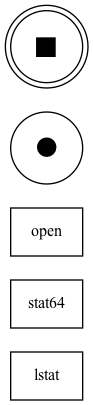

In [3]:
net, im, fm = pm4py.discover_petri_net_alpha(
    df,
    activity_key='activity',
    case_id_key='case_id',
    timestamp_key='pd_timestamp')
pm4py.view_petri_net(net, im, fm, format='png')

In [4]:
log_skeleton = pm4py.discover_log_skeleton(
    df,
    noise_threshold=0.1,
    activity_key='activity',
    case_id_key='case_id',
    timestamp_key='pd_timestamp')
log_skeleton2 = pm4py.conformance_log_skeleton(
    df,
    log_skeleton,
    activity_key='activity',
    case_id_key='case_id',
    timestamp_key='pd_timestamp')

```
pm4py.write_xes(
    df,
    './final_logs.xes',
    activity_key='event',
    case_id_key='case_id',
    timestamp_key='timestamp')
```